In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
%matplotlib inline
import seaborn as sns
sns.set()
from scipy import stats
from sklearn import linear_model, metrics, model_selection, neighbors, naive_bayes, svm, preprocessing, feature_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score



In [82]:
df = pd.read_csv('Healthcare_cleaned.csv')


In [83]:
df

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,5,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,2,1,3,3,5,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3420,1,0,2,1,3,3,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3421,1,0,2,1,3,3,3,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3422,0,0,2,1,3,0,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

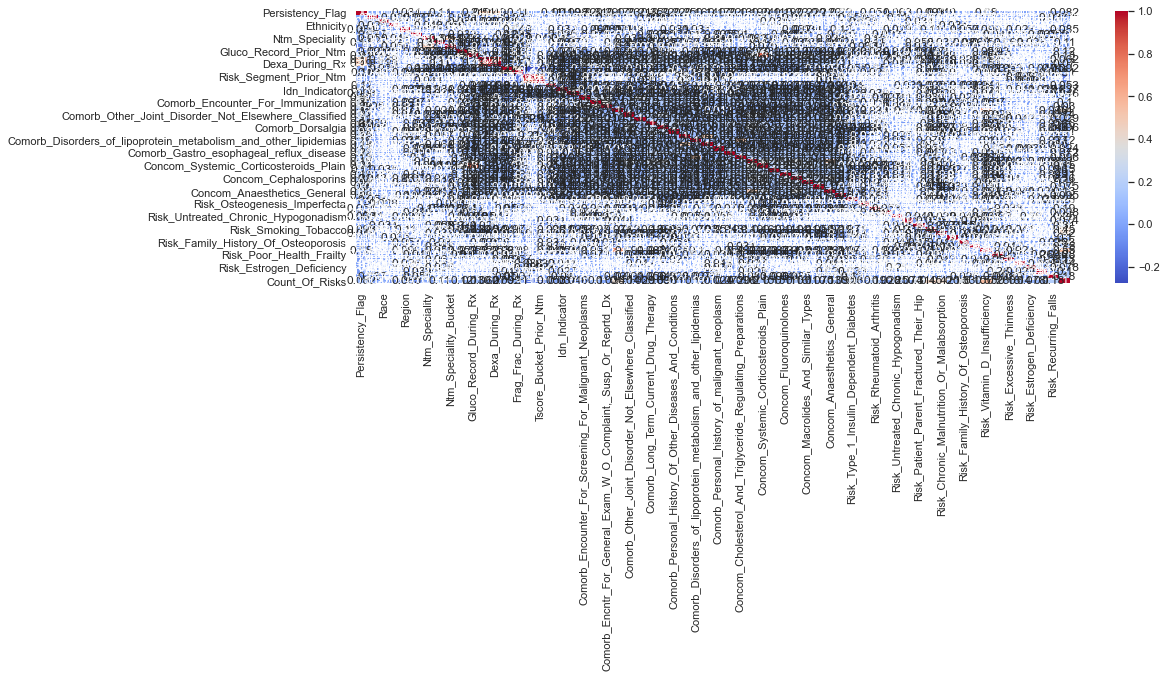

In [84]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# Machine learning 

# Baseline modeling

In [109]:
# Baseline modeling

In [110]:
X = df.drop(['Persistency_Flag'],axis =1)
y = df['Persistency_Flag']

In [111]:
rs = np.random.RandomState(seed=20)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.4, shuffle=True, random_state=rs)
X_test, X_valid, y_test, y_valid = model_selection.train_test_split(X_test, y_test, test_size = 0.5, shuffle=True, random_state=rs)

## create our three sets: train, test and validation
## use a set seed to make this work repeatable

In [112]:
print(X_test.shape)
print(X_valid.shape)
print(X_train.shape)

## just sanity check that proportions are correct

(685, 63)
(685, 63)
(2054, 63)


In [113]:
baseline_predictions = [0 for x in y_valid]
metrics.accuracy_score(y_valid, baseline_predictions)
## baseline predicition not using any model to see probaility that the pateint is persistent to drug

0.6335766423357664

In [114]:
baseline_predictions = [1 for x in y_valid]
metrics.accuracy_score(y_valid, baseline_predictions)
## baseline predicition not using any model to see probaility that the pateint is not persistent to drug

0.36642335766423356

In [115]:
classifiers = [GradientBoostingClassifier(),
               RandomForestClassifier(),
               neighbors.KNeighborsClassifier(),
               naive_bayes.GaussianNB(),
               naive_bayes.MultinomialNB(),
               linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=9999),
               svm.LinearSVC(max_iter=9999),
               svm.SVC(kernel='rbf', gamma='auto', max_iter=9999)]
classifier_names = ['Gradient Boosting','Random Forest','KNN','Gaussian NB','Multinomial NB','Logistic','Linear SVM','Non-Linear SVM']
accuracies = []
for clf, name in zip(classifiers,classifier_names):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_valid)
    acc = metrics.accuracy_score(predictions, y_valid)
    accuracies.append(acc)
    c = classification_report(y_valid,predictions)
    rc = roc_auc_score(y_valid,predictions)
    print(clf)
    print('ROC-AUC score')
    print(rc)
    print(c)
models = pd.DataFrame({'model':classifier_names, 'Accuracy':accuracies})    
models


GradientBoostingClassifier()
ROC-AUC score
0.7646969724787485
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       434
           1       0.74      0.67      0.70       251

    accuracy                           0.79       685
   macro avg       0.78      0.76      0.77       685
weighted avg       0.79      0.79      0.79       685

RandomForestClassifier()
ROC-AUC score
0.7878577854480695
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       434
           1       0.77      0.69      0.73       251

    accuracy                           0.81       685
   macro avg       0.80      0.79      0.79       685
weighted avg       0.81      0.81      0.81       685

KNeighborsClassifier()
ROC-AUC score
0.7370976921805864
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       434
           1       0.79      0.56      0.66       251

    ac

C:\Users\cp496\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=9999)
ROC-AUC score
0.7798896579580296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       434
           1       0.77      0.68      0.72       251

    accuracy                           0.81       685
   macro avg       0.80      0.78      0.79       685
weighted avg       0.80      0.81      0.80       685

SVC(gamma='auto', max_iter=9999)
ROC-AUC score
0.757857969045477
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       434
           1       0.80      0.61      0.69       251

    accuracy                           0.80       685
   macro avg       0.80      0.76      0.77       685
weighted avg       0.80      0.80      0.79       685



,model,Accuracy
0,Gradient Boosting,0.791241
1,Random Forest,0.813139
2,KNN,0.783942
3,Gaussian NB,0.462774
4,Multinomial NB,0.779562
5,Logistic,0.811679
6,Linear SVM,0.807299
7,Non-Linear SVM,0.798540


# Feature Scaling

In [116]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

##Normalising the data to improve accuracy of model 

In [117]:
rs = np.random.RandomState(seed=20)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.4, shuffle=True, random_state=rs)
X_test, X_valid, y_test, y_valid = model_selection.train_test_split(X_test, y_test, test_size = 0.5, shuffle=True, random_state=rs)

## create our three sets: train, test and validation
## use a set seed to make this work repeatable
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(2054, 63)
(685, 63)
(685, 63)


In [137]:
classifiers = [GradientBoostingClassifier(),
               RandomForestClassifier(),
               neighbors.KNeighborsClassifier(),
               naive_bayes.GaussianNB(),
               naive_bayes.MultinomialNB(),
               linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=9999),
               svm.LinearSVC(max_iter=9999),
               svm.SVC(kernel='rbf', gamma='auto', max_iter=9999)]
classifier_names = ['Gradient Boosting','Random Forest','KNN','Gaussian NB','Multinomial NB','Logistic','Linear SVM','Non-Linear SVM']
accuracies = []
for clf, name in zip(classifiers,classifier_names):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_valid)
    acc = metrics.accuracy_score(predictions, y_valid)
    accuracies.append(acc)
    c = classification_report(y_valid,predictions)
    rc = roc_auc_score(y_valid,predictions)
    print(clf)
    print('ROC-AUC score')
    print(rc)
    print(c)
models = pd.DataFrame({'model':classifier_names, 'Accuracy':accuracies})    
models

## table showing baseline/accuracy when using model after scalling 'KNN','Gaussian NB','Multinomial NB','Logistic','Linear SVM' and'Non-Linear SVM'
## Logistic model seems to the most accurate.

GradientBoostingClassifier()
ROC-AUC score
0.7646969724787485
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       434
           1       0.74      0.67      0.70       251

    accuracy                           0.79       685
   macro avg       0.78      0.76      0.77       685
weighted avg       0.79      0.79      0.79       685

RandomForestClassifier()
ROC-AUC score
0.7807296160978207
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       434
           1       0.77      0.68      0.72       251

    accuracy                           0.81       685
   macro avg       0.80      0.78      0.79       685
weighted avg       0.80      0.81      0.80       685

KNeighborsClassifier()
ROC-AUC score
0.7473699671360641
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       434
           1       0.80      0.58      0.67       251

    ac

,model,Accuracy
0,Gradient Boosting,0.791241
1,Random Forest,0.807299
2,KNN,0.792701
3,Gaussian NB,0.379562
4,Multinomial NB,0.800000
5,Logistic,0.816058
6,Linear SVM,0.807299
7,Non-Linear SVM,0.807299


# Feature Selection Method - Wrapper methods

In [175]:
columns = df.drop(['Persistency_Flag'],axis =1).columns.tolist()

num_to_keep = 5
best_features = []
for i in range(0, num_to_keep):
    best_acc = 0.0
    feature_to_add = ''
    for column in columns:
        feature_num = columns.index(column)
        if feature_num in best_features:
            continue
        features = best_features+[feature_num]
        clf = neighbors.KNeighborsClassifier()
        clf.fit(X_train[:,features], y_train)
        predictions = clf.predict(X_valid[:,features])
        acc = metrics.accuracy_score(predictions, y_valid)
        if acc > best_acc:
            best_acc = acc
            feature_to_add = feature_num
    best_features.append(feature_to_add)
print(best_features)
##using feature selection method getting best 5 features to use with KNN
##Dexa_During_Rx                                                      
##Dexa_Freq_During_Rx                                                 
##Frag_Frac_During_Rx 
##Race
##Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx

[11, 10, 13, 1, 24]


In [176]:
subset = [11,10,13,1,24]
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train[:,subset], y_train)
predictions = clf.predict(X_valid[:,subset])
acc = metrics.accuracy_score(predictions, y_valid)
c = classification_report(y_valid,predictions)
rc = roc_auc_score(y_valid,predictions)
acc
##KNN model give 0.783 accuracy when using the five subset given by wrapper method

0.781021897810219

In [164]:
print('ROC-AUC score')
print(rc)


ROC-AUC score
0.7337378596214221


In [61]:
print(c)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       434
           1       0.80      0.55      0.65       251

    accuracy                           0.78       685
   macro avg       0.79      0.73      0.75       685
weighted avg       0.79      0.78      0.77       685



In [172]:
columns = df.drop(['Persistency_Flag'],axis =1).columns.tolist()
num_to_keep = 5
best_features = []
for i in range(0, num_to_keep):
    best_acc = 0.0
    feature_to_add = ''
    for column in columns:
        feature_num = columns.index(column)
        if feature_num in best_features:
            continue
        features = best_features+[feature_num]
        clf = naive_bayes.GaussianNB()
        clf.fit(X_train[:,features], y_train)
        predictions = clf.predict(X_valid[:,features])
        acc = metrics.accuracy_score(predictions, y_valid)
        if acc > best_acc:
            best_acc = acc
            feature_to_add = feature_num
    best_features.append(feature_to_add)
print(best_features)
##using feature selection method getting best 5 features to use with GaussianNB

[10, 17, 4, 12, 14]


In [174]:
subset = [10,17,4,12,14]
clf = naive_bayes.GaussianNB()
clf.fit(X_train[:,subset], y_train)
predictions = clf.predict(X_valid[:,subset])
acc = metrics.accuracy_score(predictions, y_valid)
c = classification_report(y_valid,predictions)
rc = roc_auc_score(y_valid,predictions)
acc
##KNN model give 0.781 accuracy when using the five subset given by wrapper method

0.781021897810219

In [127]:
print('ROC-AUC score')
print(rc)


ROC-AUC score
0.7289138377366111


In [64]:
print(c)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       434
           1       0.80      0.53      0.64       251

    accuracy                           0.78       685
   macro avg       0.79      0.73      0.74       685
weighted avg       0.78      0.78      0.77       685



In [158]:
columns = df.drop(['Persistency_Flag'],axis =1).columns.tolist()
num_to_keep = 5
best_features = []
for i in range(0, num_to_keep):
    best_acc = 0.0
    feature_to_add = ''
    for column in columns:
        feature_num = columns.index(column)
        if feature_num in best_features:
            continue
        features = best_features+[feature_num]
        clf = linear_model.LogisticRegression()
        clf.fit(X_train[:,features], y_train)
        predictions = clf.predict(X_valid[:,features])
        acc = metrics.accuracy_score(predictions, y_valid)
        if acc > best_acc:
            best_acc = acc
            feature_to_add = feature_num
    best_features.append(feature_to_add)
print(best_features)
##using feature selection method getting best 5 features to use with Logistic Regression 

[10, 12, 0, 1, 11]


In [166]:
subset = [10,12,0,1,11]
clf = linear_model.LogisticRegression()
clf.fit(X_train[:,subset], y_train)
predictions = clf.predict(X_valid[:,subset])
acc = metrics.accuracy_score(predictions, y_valid)
c = classification_report(y_valid,predictions)
rc = roc_auc_score(y_valid,predictions)
acc
##Logistic model give 0.782 accuracy when using the five subset given by wrapper method

0.7824817518248175

In [167]:
print('ROC-AUC score')
print(rc)


ROC-AUC score
0.73006591146933


In [67]:
print(c)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       434
           1       0.81      0.53      0.64       251

    accuracy                           0.78       685
   macro avg       0.79      0.73      0.74       685
weighted avg       0.79      0.78      0.77       685



In [155]:
columns = df.drop(['Persistency_Flag'],axis =1).columns.tolist()
num_to_keep = 5
best_features = []
for i in range(0, num_to_keep):
    best_acc = 0.0
    feature_to_add = ''
    for column in columns:
        feature_num = columns.index(column)
        if feature_num in best_features:
            continue
        features = best_features+[feature_num]
        clf = RandomForestClassifier()
        clf.fit(X_train[:,features], y_train)
        predictions = clf.predict(X_valid[:,features])
        acc = metrics.accuracy_score(predictions, y_valid)
        if acc > best_acc:
            best_acc = acc
            feature_to_add = feature_num
    best_features.append(feature_to_add)
print(best_features)
##using feature selection method getting best 5 features to use with Random Forest

[10, 12, 15, 49, 43]


In [156]:
subset = [10,12,15,49,43]
clf = RandomForestClassifier()
clf.fit(X_train[:,subset], y_train)
predictions = clf.predict(X_valid[:,subset])
acc = metrics.accuracy_score(predictions, y_valid)
c = classification_report(y_valid,predictions)
rc = roc_auc_score(y_valid,predictions)
acc
##Random Forest model give 0.78 accuracy when using the five subset given by wrapper method

0.7795620437956204

In [157]:
print('ROC-AUC score')
print(rc)


ROC-AUC score
0.7252418895845191


In [74]:
print(c)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       434
           1       0.81      0.52      0.63       251

    accuracy                           0.78       685
   macro avg       0.79      0.72      0.74       685
weighted avg       0.78      0.78      0.76       685



In [168]:
columns = df.drop(['Persistency_Flag'],axis =1).columns.tolist()
num_to_keep = 5
best_features = []
for i in range(0, num_to_keep):
    best_acc = 0.0
    feature_to_add = ''
    for column in columns:
        feature_num = columns.index(column)
        if feature_num in best_features:
            continue
        features = best_features+[feature_num]
        clf = GradientBoostingClassifier()
        clf.fit(X_train[:,features], y_train)
        predictions = clf.predict(X_valid[:,features])
        acc = metrics.accuracy_score(predictions, y_valid)
        if acc > best_acc:
            best_acc = acc
            feature_to_add = feature_num
    best_features.append(feature_to_add)
print(best_features)
##using feature selection method getting best 5 features to use with Gradient Boosting

[10, 17, 12, 0, 11]


In [170]:
subset = [10,17,12,0,11]
clf = GradientBoostingClassifier()
clf.fit(X_train[:,subset], y_train)
predictions = clf.predict(X_valid[:,subset])
acc = metrics.accuracy_score(predictions, y_valid)
c = classification_report(y_valid,predictions)
rc = roc_auc_score(y_valid,predictions)
acc
##Gradient Boosting model give 0.782 accuracy when using the five subset given by wrapper method

0.7824817518248175

In [171]:
print('ROC-AUC score')
print(rc)

ROC-AUC score
0.7309058696091211


In [80]:
print(c)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       434
           1       0.80      0.54      0.64       251

    accuracy                           0.78       685
   macro avg       0.79      0.73      0.74       685
weighted avg       0.79      0.78      0.77       685



# Best model looking at ROC-AUC score and accuracy is Logitic model 5 features
# Gender
# Race
# Dexa_Freq_During_Rx
# Dexa_During_Rx
# Frag_Frac_Prior_Ntm